In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [2]:
team_list = ["원주 DB", "서울 삼성", "서울 SK", "창원 LG", "고양 소노", "부산 KCC", "안양 정관장", "수원 KT", "대구 한국가스공사", "울산 현대모비스", "상무"]
print("=========홈팀 번호를 입력해주세요!!! ===========")
team_num = 0
for team in team_list: 
    print(f"{team} - {team_num}")
    team_num +=1
team1 = int(input())
print("=========원정팀 번호를 입력해주세요!!! ===========")
team_num = 0
for team in team_list: 
    print(f"{team} - {team_num}")
    team_num +=1
team2 = int(input())

url = "https://www.kbl.or.kr/game/compare-team"
driver = webdriver.Chrome()
driver.get(url)

select_element = driver.find_element(By.XPATH, '//ul[@class="filter-wrap"]/li[3]//select')

select = Select(select_element)
select.select_by_value(team_list[team1])

select_element = driver.find_element(By.XPATH, '//ul[@class="filter-wrap"]/li[4]//select')

select = Select(select_element)
select.select_by_value(team_list[team2])

time.sleep(2)


page_source = driver.page_source

# BeautifulSoup으로 파싱
soup = BeautifulSoup(page_source, 'html.parser')

# 하위 3번째 div에서 테이블 선택
table = soup.select('div.con-box:nth-of-type(3) table')[0]


rows = table.find_all('tr')
data = []

columnsTest = [th.text.strip() for th in rows[0].find_all('th')]
for row in rows[1:]:
    row_data = [td.text.strip() for td in row.find_all('td')]
    data.append(row_data)

print(data)
driver.quit()

=========홈팀 번호를 입력해주세요!!! ===========
원주 DB - 0
서울 삼성 - 1
서울 SK - 2
창원 LG - 3
고양 소노 - 4
부산 KCC - 5
안양 정관장 - 6
수원 KT - 7
대구 한국가스공사 - 8
울산 현대모비스 - 9
상무 - 10


 1


=========원정팀 번호를 입력해주세요!!! ===========
원주 DB - 0
서울 삼성 - 1
서울 SK - 2
창원 LG - 3
고양 소노 - 4
부산 KCC - 5
안양 정관장 - 6
수원 KT - 7
대구 한국가스공사 - 8
울산 현대모비스 - 9
상무 - 10


 2


[[], ['77.9', '75.0', '득점(PTS)', '82.6', '80.0'], ['37.7', '40.2', '리바운드(REB)', '37.6', '36.7'], ['16.9', '16.2', '어시스트(AST)', '21.8', '18.0'], ['5.0', '4.0', '스틸(STL)', '8.2', '7.3'], ['2.1', '2.0', '블록(BS)', '4.6', '2.5'], ['22.4', '19.6', '2점(2P)', '27.6', '24.3'], ['49.3', '44.3', '2점 성공률(2P%)', '52.1', '50.1'], ['6.8', '7.8', '3점(3P)', '5.8', '6.8'], ['28.7', '30.7', '3점 성공률(3P%)', '26.9', '31.8'], ['12.6', '12.4', '자유투(FT)', '10.0', '11.0'], ['68.8', '78.5', '자유투 성공률(FT%)', '73.5', '72.6']]


In [4]:
select_team_1 = team_list[team1]
select_team_2 = team_list[team2]


# Pandas DataFrame 생성
columns = [f"{team_list[team1]} 시즌 평균", f"vs {team_list[team2]}", '기록', f"{team_list[team2]} 시즌 평균", f"vs {team_list[team1]}"]

df = pd.DataFrame(data, columns=columns)
df = df.iloc[1:].reset_index(drop=True)

print(df)
data = [row for row in data if row]

team_1_avg = []
team_2_avg = []
category = []
team_1_opt = []
team_2_opt = []
rank = 0

for value in data:
    team_1_avg.append(value[0])
    team_2_avg.append(value[3])
    data1 = float(value[0])*0.55 + float(value[1])*0.45
    data2 = float(value[3])*0.55 + float(value[4])*0.45
    team_1_opt.append(data1)
    team_2_opt.append(data2)
    category.append(value[2])
    if data1 > data2: rank +=1

team_1_info = [float(val) for val in team_1_avg]
team_2_info = [float(val) for val in team_2_avg]

new_data = {
    'Category': category,
    select_team_1 : team_1_info,
    select_team_2 : team_2_info,
}

opt_dat = {
    'Category' : category,
    select_team_1 : team_1_opt,
    select_team_2 : team_2_opt,
}



  서울 삼성 시즌 평균 vs 서울 SK            기록 서울 SK 시즌 평균 vs 서울 삼성
0        37.7     40.2     리바운드(REB)        37.6     36.7
1        16.9     16.2     어시스트(AST)        21.8     18.0
2         5.0      4.0       스틸(STL)         8.2      7.3
3         2.1      2.0        블록(BS)         4.6      2.5
4        22.4     19.6        2점(2P)        27.6     24.3
5        49.3     44.3   2점 성공률(2P%)        52.1     50.1
6         6.8      7.8        3점(3P)         5.8      6.8
7        28.7     30.7   3점 성공률(3P%)        26.9     31.8
8        12.6     12.4       자유투(FT)        10.0     11.0
9        68.8     78.5  자유투 성공률(FT%)        73.5     72.6


/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing fr

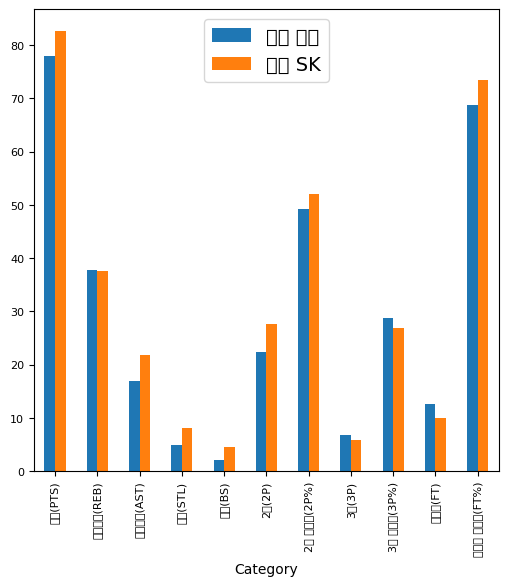

/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sayyyho/dev/toy/kbl/kbl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing

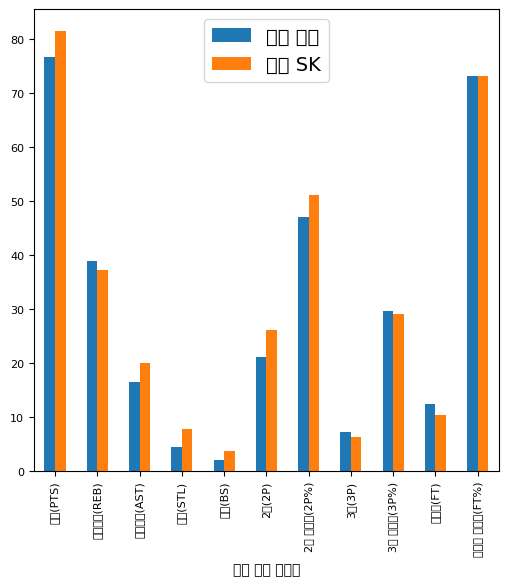

In [6]:
df = pd.DataFrame(new_data)
opt_df = pd.DataFrame(opt_dat)


df.set_index('Category').plot(kind='bar', stacked=False, figsize=[6, 6], fontsize=8)
plt.legend([select_team_1,select_team_2],fontsize=14)

opt_df.set_index('Category').plot(kind='bar', stacked=False, figsize=[6, 6], fontsize=8)
plt.legend([select_team_1,select_team_2],fontsize=14)
plt.xlabel("예측 결과 시각화")
plt.show()